In [1]:
# import the usual modules
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get current working directory
os.getcwd()

'/Users/clement.guiraud/Desktop/Data analysis/Data analysis track'

In [3]:
# to be adjusted on your own computer
os.chdir('../Data analysis track')
os.getcwd()

'/Users/clement.guiraud/Desktop/Data analysis/Data analysis track'

In [4]:
# import data from Excel file - index_col = 0 indicates that the first column is a label
df = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="DATA_ACP_ACTIF",index_col=0)

# print summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CYL     18 non-null     int64
 1   PUISS   18 non-null     int64
 2   LONG    18 non-null     int64
 3   LARG    18 non-null     int64
 4   POIDS   18 non-null     int64
 5   VMAX    18 non-null     int64
dtypes: int64(6)
memory usage: 1008.0+ bytes


In [5]:
# display all the dataframe
display(df)

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


## Analyzing distance between individuals

### Two features only

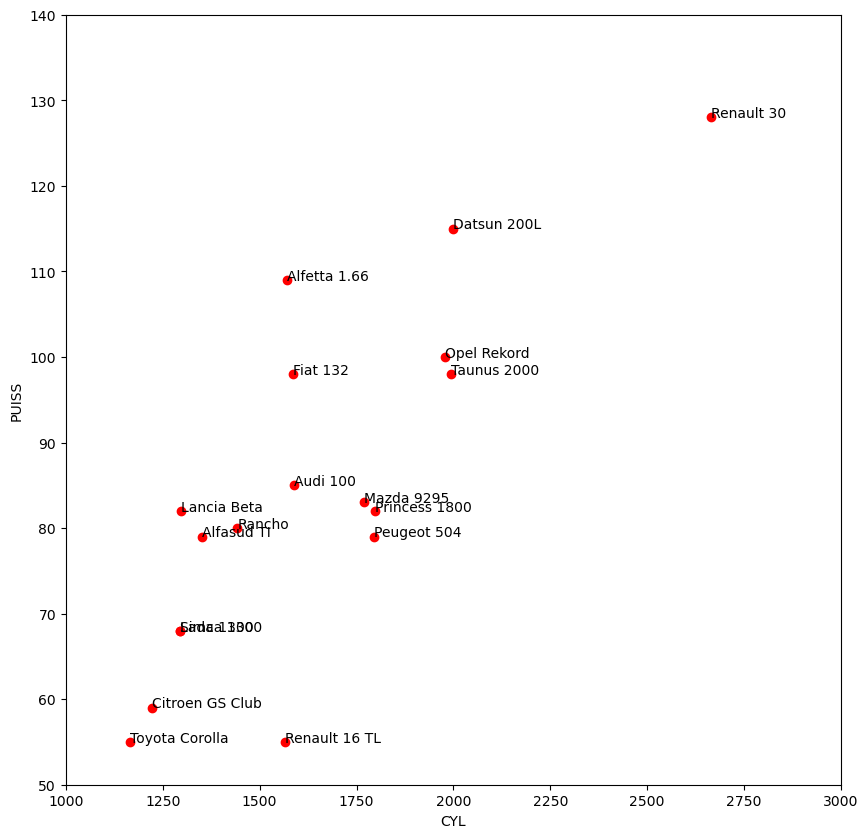

In [6]:
# preparing the plot
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df['CYL'],df['PUISS'],"ro")
ax.axis([1000,3000,50,140])
ax.set_xlabel("CYL")
ax.set_ylabel("PUISS")

# adding labels to the cars
for v in df.index:
    ax.text(df.loc[v,"CYL"],df.loc[v,'PUISS'],v)
    
# display plot
plt.show()

In [7]:
dir(fig)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_cachedRenderer',
 '_callbacks',
 '_canvas_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_constrained',
 '_constrained_layout_pads',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_get_draw_artists',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_localaxes',
 '_mouseover',
 '_normalize_grid_string',
 '_original_dpi',
 '_path_effects',
 '_picker',
 '_process_projection_r

In [8]:
# print the two variables and sort by increasing value of cylinder
dfbis = df[['CYL','PUISS']].sort_values(by="CYL",ascending=True)
display(dfbis)

,CYL,PUISS
Modele,,
Toyota Corolla,1166,55
Citroen GS Club,1222,59
Lada 1300,1294,68
Simca 1300,1294,68
Lancia Beta,1297,82
Alfasud TI,1350,79
Rancho,1442,80
Renault 16 TL,1565,55
Alfetta 1.66,1570,109


### Beyond two features

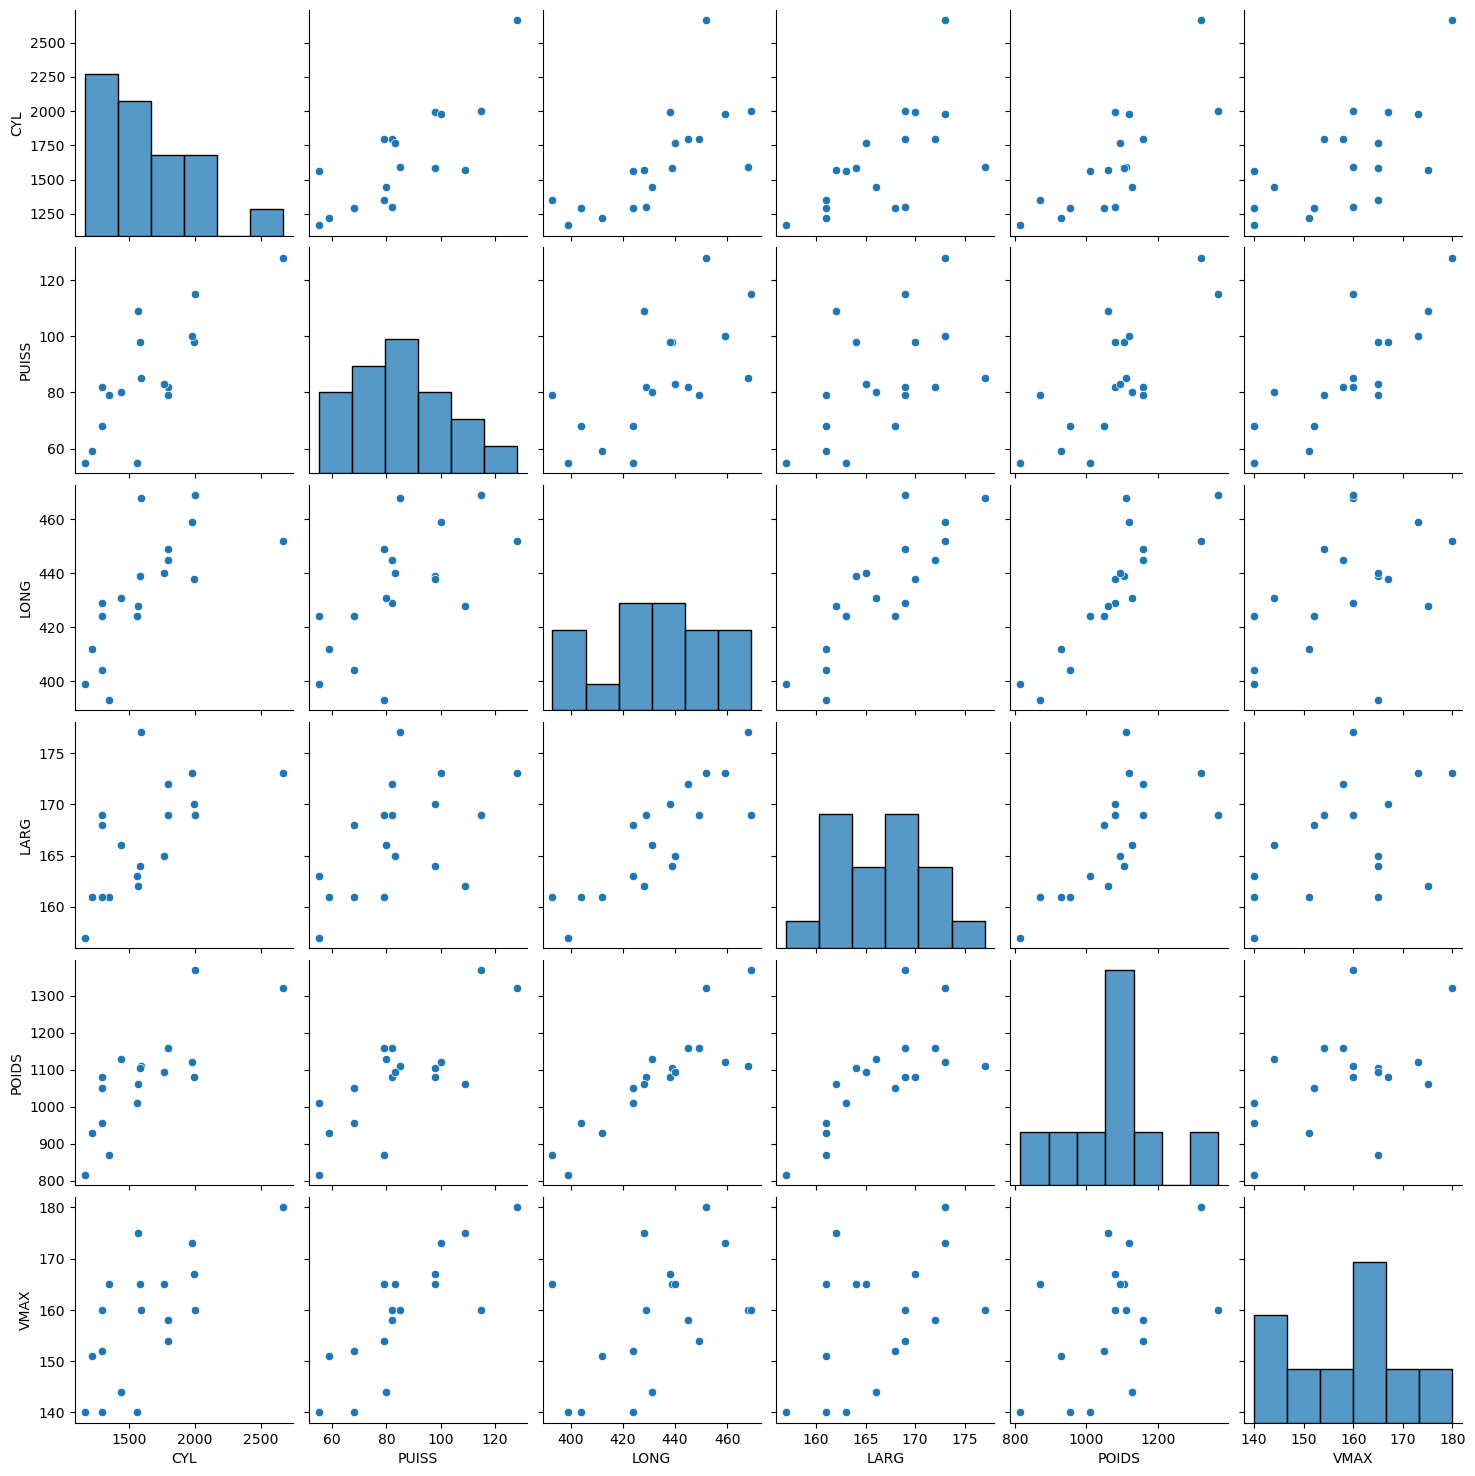

In [9]:
# pairplot
sns.pairplot(df) ;

In [10]:
# Effect size (correlation matrix)
display(df.corr(method='spearman'))
display(df.corr(method='pearson'))

,CYL,PUISS,LONG,LARG,POIDS,VMAX
CYL,1.000000,0.793998,0.851756,0.756231,0.819638,0.651439
PUISS,0.793998,1.000000,0.731886,0.614346,0.680477,0.858933
LONG,0.851756,0.731886,1.000000,0.852704,0.914729,0.466501
LARG,0.756231,0.614346,0.852704,1.000000,0.784645,0.460094
POIDS,0.819638,0.680477,0.914729,0.784645,1.000000,0.373186
VMAX,0.651439,0.858933,0.466501,0.460094,0.373186,1.000000


,CYL,PUISS,LONG,LARG,POIDS,VMAX
CYL,1.000000,0.796628,0.701462,0.629757,0.788952,0.664934
PUISS,0.796628,1.000000,0.641362,0.520832,0.765293,0.844379
LONG,0.701462,0.641362,1.000000,0.849266,0.868090,0.475928
LARG,0.629757,0.520832,0.849266,1.000000,0.716874,0.472945
POIDS,0.788952,0.765293,0.868090,0.716874,1.000000,0.477596
VMAX,0.664934,0.844379,0.475928,0.472945,0.477596,1.000000


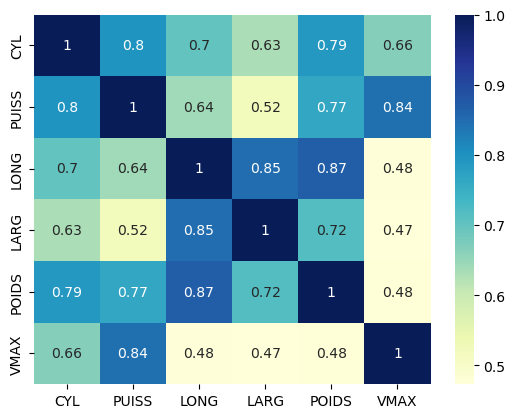

In [11]:
# heatmap with seaborn
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

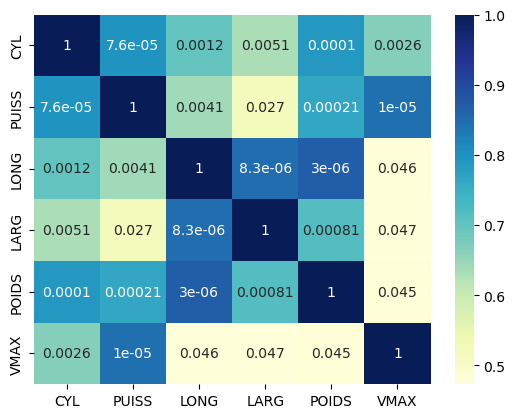

In [12]:
# heatmap with pearson correlation pvalues
from scipy.stats import pearsonr

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

sns.heatmap(df.corr(), cmap="YlGnBu", annot=df.corr(method=pearsonr_pval))
plt.show()

### Comparing distance between individuals

In [13]:
# distance between Audi and Fiat without normalization
np.sqrt(np.sum((dfbis.loc['Audi 100'] - dfbis.loc['Fiat 132'])**2))

13.341664064126334

In [14]:
# distance between Audi and Mazda without normalization
np.sqrt(np.sum((dfbis.loc['Audi 100'] - dfbis.loc['Mazda 9295'])**2))

181.01104938649465

In [15]:
dfbis.describe().T

,count,mean,std,min,25%,50%,75%,max
CYL,18.0,1631.666667,373.929846,1166.0,1310.25,1577.5,1797.5,2664.0
PUISS,18.0,84.611111,20.376281,55.0,70.75,82.0,98.0,128.0


In [16]:
# define X matrix as an array
X = dfbis.values

# biased standard deviation
sigmas = np.std(X,axis=0,ddof=0)
print(sigmas)

[363.39449027  19.80218531]


In [17]:
# weighted distance between Audi and Fiat
np.sqrt(np.sum((1/sigmas**2)*(dfbis.loc['Audi 100'] - dfbis.loc['Fiat 132'])**2))

0.6565451047185447

In [18]:
# weighted distance between Audi and Mazda
np.sqrt(np.sum((1/sigmas**2)*(dfbis.loc['Audi 100'] - dfbis.loc['Mazda 9295'])**2))

0.5082182304292723

### Computing inertia using the overal distance between two individuals

In [19]:
# sample size (number of instances)
n = X.shape[0]
print(f"n = {n}")

# inertia version 1 -- distance between the individuals two by two
Ip_v1 = 0

for i1 in range(n):
    for i2 in range(n):
        Ip_v1 += np.sum((X[i1,:]-X[i2,:])**2)
        
Ip_v1 *= (1/(2*n**2))
print(f"Inertia, Approach 1 = {Ip_v1:.2f}")

n = 18
Inertia, Approach 1 = 132447.68


In [20]:
# centroids -- Coordinates of G
moyennes = np.mean(X,axis=0)
print(moyennes)

[1631.66666667   84.61111111]


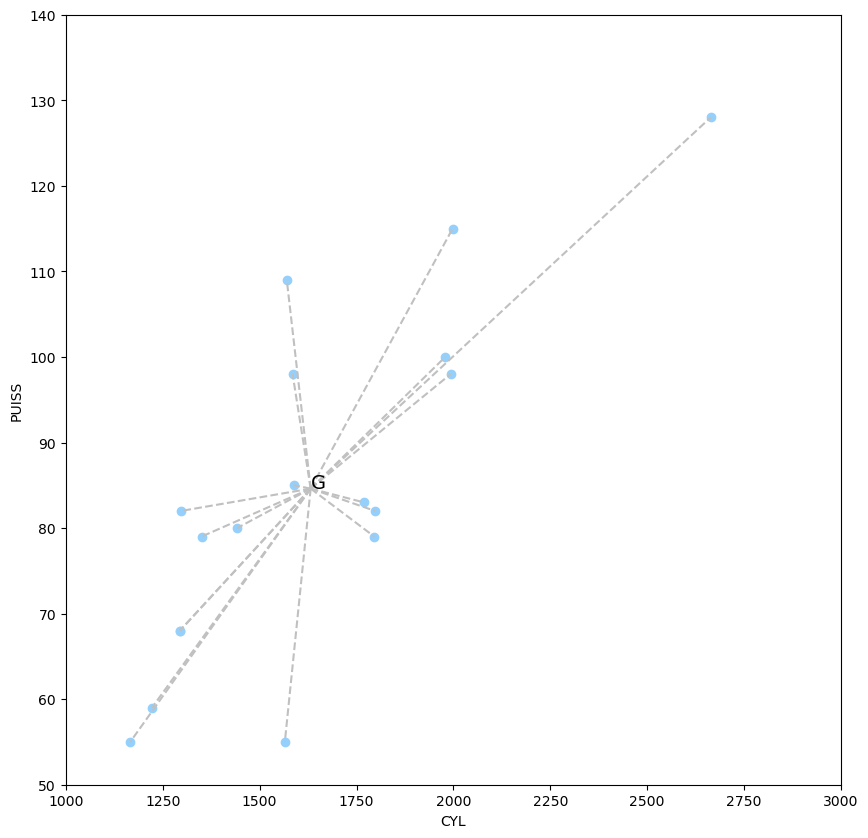

In [21]:
# data points with centroid G
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df['CYL'],df['PUISS'],color='xkcd:light blue',marker='o',linestyle='None')
ax.axis([1000,3000,50,140])
ax.set_xlabel("CYL")
ax.set_ylabel("PUISS")
# included dashed lines between the data points and the centroid
for i in range(df.shape[0]):
    ax.plot([moyennes[0],df['CYL'][i]],[moyennes[1],df['PUISS'][i]],color='silver',linestyle='dashed')
# label centroid G
ax.text(moyennes[0],moyennes[1],"G",fontsize=14)
# display
plt.show()

### Computing inertia based on the dispersion from the centroid

In [22]:
# centroid vector G
print(moyennes)

# inertia version 2 - dispersion from G
Ip_v2 = np.mean(np.apply_along_axis(func1d=lambda x: np.sum((x-moyennes)**2),axis=1,arr=X))
print("Inertia, Approach 2 = %.2f" % (Ip_v2))

[1631.66666667   84.61111111]
Inertia, Approach 2 = 132447.68


### Inertia as a sum for the variances

In [23]:
# standard deviation per variable
print(sigmas)

# verification -- sum of variances
print("Sum of variances = %.2f" % (np.sum(sigmas**2)))

[363.39449027  19.80218531]
Sum of variances = 132447.68


In [24]:
# standardized data
Z = (X - moyennes)/sigmas
display(pd.DataFrame(Z,index=dfbis.index, columns=['PUISS','CYL']))

# check average - should be 0
print(f'mean of standardized variable :{np.mean(Z,axis=0)}')

# check standard deviation - should be 1
print(f'standard deviation of standardized variable : {np.std(Z,axis=0,ddof=0)}')

,PUISS,CYL
Modele,,
Toyota Corolla,-1.281436,-1.495346
Citroen GS Club,-1.127333,-1.293348
Lada 1300,-0.929201,-0.838852
Simca 1300,-0.929201,-0.838852
Lancia Beta,-0.920946,-0.131860
Alfasud TI,-0.775099,-0.283358
Rancho,-0.521930,-0.232859
Renault 16 TL,-0.183455,-1.495346
Alfetta 1.66,-0.169696,1.231626


mean of standardized variable :[-1.72701359e-16 -1.48029737e-16]
standard deviation of standardized variable : [1. 1.]


In [25]:
# standardized data
Z = (X - moyennes)/sigmas
display(pd.DataFrame(Z,index=dfbis.index, columns=['PUISS','CYL']))

# check average - should be 0
print(f'mean of standardized variable :{np.array2string(np.mean(Z,axis=0), precision=2, floatmode="fixed", suppress_small=True)}') 

# check standard deviation - should be 1
print(f'standard deviation of standardized variable : {np.array2string(np.std(Z,axis=0,ddof=0), precision=2, floatmode="fixed", suppress_small=True)}') 

,PUISS,CYL
Modele,,
Toyota Corolla,-1.281436,-1.495346
Citroen GS Club,-1.127333,-1.293348
Lada 1300,-0.929201,-0.838852
Simca 1300,-0.929201,-0.838852
Lancia Beta,-0.920946,-0.131860
Alfasud TI,-0.775099,-0.283358
Rancho,-0.521930,-0.232859
Renault 16 TL,-0.183455,-1.495346
Alfetta 1.66,-0.169696,1.231626


mean of standardized variable :[-0.00 -0.00]
standard deviation of standardized variable : [1.00 1.00]


### (Standardized) PCA with scikit learn

In [26]:
# PCA module in scikit learn
from sklearn.decomposition import PCA
acp = PCA()

# factor coordinates
coord = acp.fit_transform(Z)

# display the new coordinates
pd.DataFrame(coord,index=dfbis.index, columns=['F1','F2'])

,F1,F2
Modele,,
Toyota Corolla,-1.963481,-0.151257
Citroen GS Club,-1.711680,-0.117390
Lada 1300,-1.250203,0.063886
Simca 1300,-1.250203,0.063886
Lancia Beta,-0.744446,0.557968
Alfasud TI,-0.748442,0.347713
Rancho,-0.533717,0.204405
Renault 16 TL,-1.187092,-0.927647
Alfetta 1.66,0.750898,0.990885


In [27]:
dir(acp)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random

In [28]:
acp.get_feature_names_out()

AttributeError: 'PCA' object has no attribute 'get_feature_names_out'

In [29]:
# explained variance
acp.explained_variance_

array([1.9023117 , 0.21533536])

In [30]:
# explained variance ratio
acp.explained_variance_ratio_

array([0.89831386, 0.10168614])

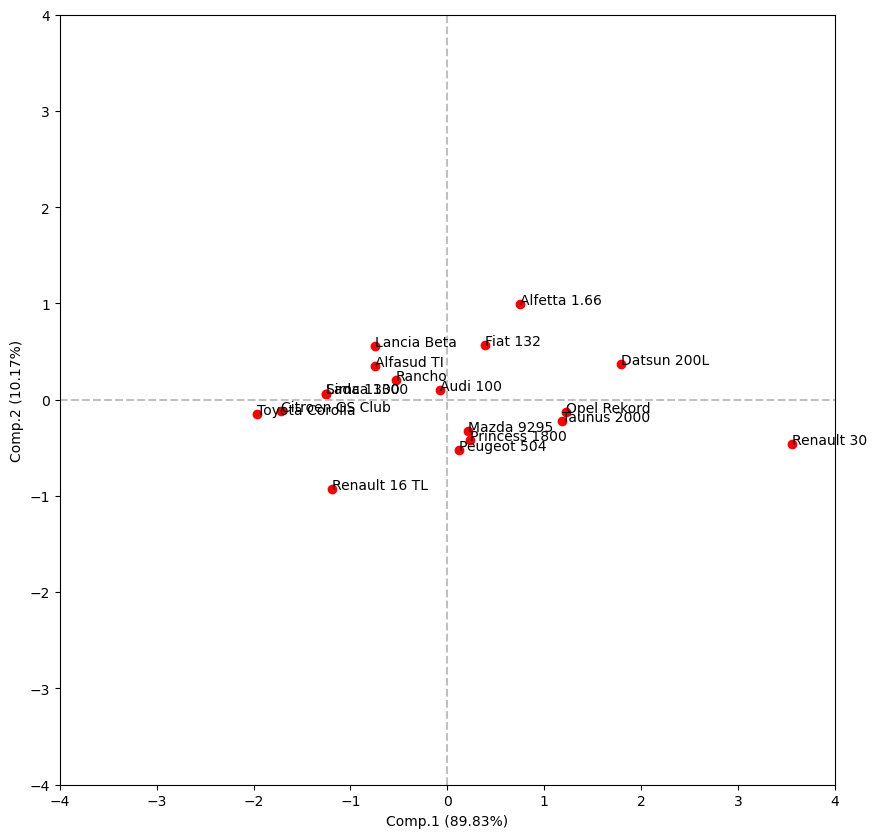

In [31]:
# position of the cars in the first factor plan
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(coord[:,0],coord[:,1],"ro")
ax.axis([-4,+4,-4,+4])
ax.plot([-4,+4],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-4,+4],color='silver',linestyle='--')
ax.set_xlabel("Comp.1 (89.83%)")
ax.set_ylabel("Comp.2 (10.17%)")

# add car labels
for i in range(n):
    ax.text(coord[i,0],coord[i,1],dfbis.index[i])
    
# display
plt.show()

In [32]:
# compute the lambdas
lambada = np.mean(np.power(coord,2),axis=0)
print(lambada)

[1.79662771 0.20337229]


**You may have different results between the two ways of computing the lambdas : why ?**

In [33]:
# compare with variance explained
lambada*n/(n-1)

array([1.9023117 , 0.21533536])

In [34]:
# proportion of variance explained by the axes
print(lambada/np.sum(lambada))

[0.89831386 0.10168614]


In [35]:
# sum of the lambdas = total inertia
print("Sum of the lambdas = %f" % (np.sum(lambada)))

Sum of the lambdas = 2.000000


In [36]:
# data frame of the standardized data
df_Z = pd.DataFrame(Z,index=dfbis.index)

# data frame of the factor coordinates
df_C = pd.DataFrame(coord,index=dfbis.index)

# squared euclidean distance between Toyota Corolla and Citroen GS
# standardized data
print(f"original distance between Toyota Corolla and Citroen GS : {np.sum((df_Z.loc['Toyota Corolla'] - df_Z.loc['Citroen GS Club'])**2)}")

# squared euclidean distance between Toyota Corolla and Citroen GS, only on the first component 
print(f"distance on the first axis between Toyota Corolla and Citroen GS : {np.sum((df_C.loc['Toyota Corolla'][0] - df_C.loc['Citroen GS Club'][0])**2)}")

original distance between Toyota Corolla and Citroen GS : 0.06455073567278283
distance on the first axis between Toyota Corolla and Citroen GS : 0.06340375071089865


In [37]:
# initial distance between Audi 100 and Fiat 132
print(f"initial distance between Audi 100 and Fiat 132: {np.sum((df_Z.loc['Audi 100'] - df_Z.loc['Fiat 132'])**2)}")

# approximate distance (Factor F1)
print(f"approximate distance between Audi 100 and Fiat 132: {np.sum((df_C.loc['Audi 100'][0] - df_C.loc['Fiat 132'][0])**2)}")

initial distance between Audi 100 and Fiat 132: 0.4310514745298847
approximate distance between Audi 100 and Fiat 132: 0.2101060634608986


In [38]:
# distance when accounting for the two factors (F1, F2)
print(np.sum((df_C.loc['Audi 100']- df_C.loc['Fiat 132'])**2))

0.43105147452988485


## Analyzing the relationship between (all) variables

### Computing the variance-covariance Matrix

In [39]:
# create the [X] matrix
X = df.values

# Compute matrix [X] covariance
# rowvar = False means the variables are not the rows but the columns
# ddof = 0 means that we do not divide the total sum of squares by n-1 but by n
V = np.cov(X,ddof=0,rowvar=False)
np.set_printoptions(precision=2,suppress=True)
print(V)

[[132055.56   5732.54   5476.56   1181.78  38159.61   2850.87]
 [  5732.54    392.13    272.86     53.26   2017.05    197.27]
 [  5476.56    272.86    461.58     94.22   2482.36    120.64]
 [  1181.78     53.26     94.22     26.67    492.72     28.81]
 [ 38159.61   2017.05   2482.36    492.72  17715.36    749.99]
 [  2850.87    197.27    120.64     28.81    749.99    139.2 ]]


In [40]:
# compute the trace of the V (variance-covariance) matrix
trace = V.trace()
print(trace)

150790.49382716054


In [41]:
# mean vector for the (p = 6) variables (column means)
moyennes = np.mean(X,axis=0)

# inertia computed from the centroid
print(np.mean(np.apply_along_axis(func1d=lambda x: np.sum((x-moyennes)**2),axis=1,arr=X)))

150790.4938271605


In [42]:
df, moyennes

(                  CYL  PUISS  LONG  LARG  POIDS  VMAX
 Modele                                               
 Alfasud TI       1350     79   393   161    870   165
 Audi 100         1588     85   468   177   1110   160
 Simca 1300       1294     68   424   168   1050   152
 Citroen GS Club  1222     59   412   161    930   151
 Fiat 132         1585     98   439   164   1105   165
 Lancia Beta      1297     82   429   169   1080   160
 Peugeot 504      1796     79   449   169   1160   154
 Renault 16 TL    1565     55   424   163   1010   140
 Renault 30       2664    128   452   173   1320   180
 Toyota Corolla   1166     55   399   157    815   140
 Alfetta 1.66     1570    109   428   162   1060   175
 Princess 1800    1798     82   445   172   1160   158
 Datsun 200L      1998    115   469   169   1370   160
 Taunus 2000      1993     98   438   170   1080   167
 Rancho           1442     80   431   166   1129   144
 Mazda 9295       1769     83   440   165   1095   165
 Opel Reko

In [43]:
# matrix of the centered variables
Z = X - moyennes
display(pd.DataFrame(Z,index=df.index, columns=df.columns))

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Alfasud TI,-281.666667,-5.611111,-40.5,-5.666667,-208.833333,6.722222
Audi 100,-43.666667,0.388889,34.5,10.333333,31.166667,1.722222
Simca 1300,-337.666667,-16.611111,-9.5,1.333333,-28.833333,-6.277778
Citroen GS Club,-409.666667,-25.611111,-21.5,-5.666667,-148.833333,-7.277778
Fiat 132,-46.666667,13.388889,5.5,-2.666667,26.166667,6.722222
Lancia Beta,-334.666667,-2.611111,-4.5,2.333333,1.166667,1.722222
Peugeot 504,164.333333,-5.611111,15.5,2.333333,81.166667,-4.277778
Renault 16 TL,-66.666667,-29.611111,-9.5,-3.666667,-68.833333,-18.277778
Renault 30,1032.333333,43.388889,18.5,6.333333,241.166667,21.722222


In [44]:
# (1/n) (Z'Z) - shoud display the variance-covariance matrix
print(np.dot(np.transpose(Z),Z)/n)

[[132055.56   5732.54   5476.56   1181.78  38159.61   2850.87]
 [  5732.54    392.13    272.86     53.26   2017.05    197.27]
 [  5476.56    272.86    461.58     94.22   2482.36    120.64]
 [  1181.78     53.26     94.22     26.67    492.72     28.81]
 [ 38159.61   2017.05   2482.36    492.72  17715.36    749.99]
 [  2850.87    197.27    120.64     28.81    749.99    139.2 ]]


In [45]:
# correlations matrix
R = np.corrcoef(X,rowvar=False)
print(R)

[[1.   0.8  0.7  0.63 0.79 0.66]
 [0.8  1.   0.64 0.52 0.77 0.84]
 [0.7  0.64 1.   0.85 0.87 0.48]
 [0.63 0.52 0.85 1.   0.72 0.47]
 [0.79 0.77 0.87 0.72 1.   0.48]
 [0.66 0.84 0.48 0.47 0.48 1.  ]]


In [46]:
# standard deviation vector for (p = 6) variables
sigmas = np.std(X,axis=0)

# standardization
Z = (X - moyennes)/sigmas

# correspondance : produit matriciel : (1/n) (Z'Z) should display the correlation matrix
print(np.dot(np.transpose(Z),Z)/n)

[[1.   0.8  0.7  0.63 0.79 0.66]
 [0.8  1.   0.64 0.52 0.77 0.84]
 [0.7  0.64 1.   0.85 0.87 0.48]
 [0.63 0.52 0.85 1.   0.72 0.47]
 [0.79 0.77 0.87 0.72 1.   0.48]
 [0.66 0.84 0.48 0.47 0.48 1.  ]]


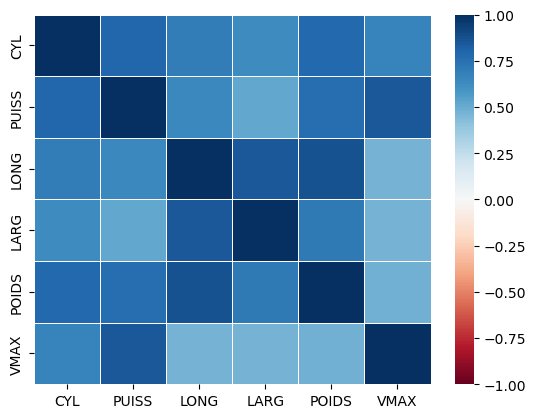

In [47]:
# heatmap to visually identify the strongest correlations
sns.heatmap(R,xticklabels=df.columns,yticklabels=df.columns,vmin=-1,vmax=+1,center=0,cmap="RdBu",linewidths=0.5);

In [48]:
# PCA on the standardized variables (p = 6 variables)
acp = PCA()

# factor coordinates
coord = acp.fit_transform(Z)

# print the new coordinates of the first cars
display(pd.DataFrame(coord,index=df.index, columns=acp.get_feature_names_out()).head())

AttributeError: 'PCA' object has no attribute 'get_feature_names_out'

In [49]:
# matrix of the centered variables
Z = (X - moyennes)/sigmas
display(pd.DataFrame(Z,index=df.index, columns=df.columns).head())

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Alfasud TI,-0.775099,-0.283358,-1.885081,-1.097345,-1.569007,0.569760
Audi 100,-0.120163,0.019639,1.605810,2.001041,0.234161,0.145972
Simca 1300,-0.929201,-0.838852,-0.442179,0.258199,-0.216631,-0.532090
Citroen GS Club,-1.127333,-1.293348,-1.000722,-1.097345,-1.118215,-0.616848
Fiat 132,-0.128419,0.676132,0.255999,-0.516398,0.196595,0.569760


### Computing the correlations between the axes and the variables

In [50]:
# number of variables
p = Z.shape[1]
print(f"p={p} \n")

# correlation between the factors and the variables
Mlambda = np.corrcoef(x=coord,y=Z,rowvar=False)[:p,p:]

# print correlation : rows = factors, columns = variables
print(Mlambda)

p=6 

[[ 0.89  0.89  0.89  0.81  0.91  0.75]
 [ 0.11  0.38 -0.38 -0.41 -0.22  0.57]
 [-0.22 -0.11  0.04  0.37 -0.3   0.3 ]
 [ 0.37 -0.17 -0.13  0.1  -0.14 -0.03]
 [ 0.05 -0.09  0.22 -0.15 -0.09  0.06]
 [-0.01 -0.13 -0.04 -0.02  0.12  0.1 ]]


In [51]:
np.set_printoptions(linewidth=100)
np.corrcoef(x=coord,y=Z,rowvar=False)

array([[ 1.  , -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.89,  0.89,  0.89,  0.81,  0.91,  0.75],
       [-0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.11,  0.38, -0.38, -0.41, -0.22,  0.57],
       [-0.  ,  0.  ,  1.  , -0.  , -0.  ,  0.  , -0.22, -0.11,  0.04,  0.37, -0.3 ,  0.3 ],
       [ 0.  ,  0.  , -0.  ,  1.  , -0.  ,  0.  ,  0.37, -0.17, -0.13,  0.1 , -0.14, -0.03],
       [ 0.  ,  0.  , -0.  , -0.  ,  1.  ,  0.  ,  0.05, -0.09,  0.22, -0.15, -0.09,  0.06],
       [-0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.01, -0.13, -0.04, -0.02,  0.12,  0.1 ],
       [ 0.89,  0.11, -0.22,  0.37,  0.05, -0.01,  1.  ,  0.8 ,  0.7 ,  0.63,  0.79,  0.66],
       [ 0.89,  0.38, -0.11, -0.17, -0.09, -0.13,  0.8 ,  1.  ,  0.64,  0.52,  0.77,  0.84],
       [ 0.89, -0.38,  0.04, -0.13,  0.22, -0.04,  0.7 ,  0.64,  1.  ,  0.85,  0.87,  0.48],
       [ 0.81, -0.41,  0.37,  0.1 , -0.15, -0.02,  0.63,  0.52,  0.85,  1.  ,  0.72,  0.47],
       [ 0.91, -0.22, -0.3 , -0.14, -0.09,  0.12,  0.79,  0.77,  0.87,

### Retrieving the lambdas for each axis

In [52]:
Mlambda**2

array([[0.8 , 0.79, 0.79, 0.66, 0.82, 0.57],
       [0.01, 0.15, 0.15, 0.17, 0.05, 0.33],
       [0.05, 0.01, 0.  , 0.14, 0.09, 0.09],
       [0.14, 0.03, 0.02, 0.01, 0.02, 0.  ],
       [0.  , 0.01, 0.05, 0.02, 0.01, 0.  ],
       [0.  , 0.02, 0.  , 0.  , 0.01, 0.01]])

In [53]:
# sum of square correlations between variables and factors
# i.e. lambda values
slambda = np.sum(Mlambda**2,axis=1)
print(slambda)

[4.42 0.86 0.37 0.21 0.09 0.04]


In [54]:
# sum of = inertia = p since this is a standardized PCA
print(np.sum(slambda))

6.000000000000002


In [55]:
# to compare with the variable perspective
# variance of the factor coordinates
print(np.var(coord,axis=0,ddof=0))

[4.42 0.86 0.37 0.21 0.09 0.04]


In [56]:
# variables list
print(df.columns)

Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'VMAX'], dtype='object')


In [57]:
# correlation between CYL and POIDS
print(R[0,4])

0.7889520283865826


In [58]:
# approximate correlation on the first factor
print(Mlambda[0,0]*Mlambda[0,4])

0.8087519932967818


In [59]:
# approximate correlation on the two firs factors
print(Mlambda[0,0]*Mlambda[0,4]+Mlambda[1,0]*Mlambda[1,4])

0.7829518411637988


In [60]:
# correlation between POIDS and VMAX
print(R[4,5])

0.4775955992662051


In [61]:
# approximate correlation on the first factor
print(Mlambda[0,4]*Mlambda[0,5])

# approximate correlations on the two first factors
print(Mlambda[0,4]*Mlambda[0,5]+Mlambda[1,4]*Mlambda[1,5])

0.6831543614480379
0.55438062524932


## Computing details : diagonalisation

In [62]:
# components
print(f"PCA components: \n {acp.components_}")

# eigenvalue #1
a = acp.components_[0]
print(f"first eigenvector: {a}")

# produit
print(f"first eigenvalue: {np.dot(np.dot(a,R),np.transpose(a)): .3f}")

# eigenvector norm
print(f"eigenvector norm: {np.linalg.norm(a) :.2f}")

PCA components: 
 [[ 0.42  0.42  0.42  0.39  0.43  0.36]
 [ 0.12  0.42 -0.41 -0.45 -0.24  0.62]
 [-0.35 -0.18  0.07  0.6  -0.48  0.49]
 [ 0.81 -0.36 -0.28  0.21 -0.3  -0.07]
 [ 0.15 -0.29  0.73 -0.48 -0.3   0.19]
 [-0.06 -0.63 -0.19 -0.11  0.58  0.46]]
first eigenvector: [0.42 0.42 0.42 0.39 0.43 0.36]
first eigenvalue:  4.421
eigenvector norm: 1.00


In [63]:
# review correlation matrix
print(R)

# computing eigenvalues and eigenvectors 
sol = np.linalg.eig(R)
type(sol),len(sol)

[[1.   0.8  0.7  0.63 0.79 0.66]
 [0.8  1.   0.64 0.52 0.77 0.84]
 [0.7  0.64 1.   0.85 0.87 0.48]
 [0.63 0.52 0.85 1.   0.72 0.47]
 [0.79 0.77 0.87 0.72 1.   0.48]
 [0.66 0.84 0.48 0.47 0.48 1.  ]]


(tuple, 2)

In [64]:
# first element of tuple are eigenvalues
print(sol[0])

[4.42 0.86 0.37 0.21 0.09 0.04]


In [65]:
# second element of tuple is eigenvectors matrix
sol[1]

array([[ 0.42,  0.12,  0.35,  0.81,  0.15, -0.06],
       [ 0.42,  0.42,  0.18, -0.36, -0.29, -0.63],
       [ 0.42, -0.41, -0.07, -0.28,  0.73, -0.19],
       [ 0.39, -0.45, -0.6 ,  0.21, -0.48, -0.11],
       [ 0.43, -0.24,  0.48, -0.3 , -0.3 ,  0.58],
       [ 0.36,  0.62, -0.49, -0.07,  0.19,  0.46]])

In [66]:
# eigenvector for the firs factor
print(sol[1][:,0])

[0.42 0.42 0.42 0.39 0.43 0.36]


In [67]:
# check its norm
print(np.linalg.norm(sol[1][:,0]))

1.0


In [68]:
# is the matrix actually orthonormal ?
print(np.dot(np.transpose(sol[1]),sol[1]))

[[ 1.  0. -0. -0.  0. -0.]
 [ 0.  1.  0.  0.  0. -0.]
 [-0.  0.  1.  0.  0.  0.]
 [-0.  0.  0.  1. -0.  0.]
 [-0.  0.  0. -0.  1.  0.]
 [-0. -0.  0.  0.  0.  1.]]


In [69]:
# factor coordinates on the first factor (n°0)
# dot product of the Z matrix on the first coordinate
c1 = np.dot(Z,sol[1][:,0])

# print coordinates with car labels
print(pd.DataFrame(c1,columns=['F_1'],index=df.index))

                      F_1
Modele                   
Alfasud TI      -2.138924
Audi 100         1.561459
Simca 1300      -1.119385
Citroen GS Club -2.573742
Fiat 132         0.427855
Lancia Beta     -0.304238
Peugeot 504      0.683928
Renault 16 TL   -1.948493
Renault 30       4.409735
Toyota Corolla  -3.985782
Alfetta 1.66     0.437658
Princess 1800    1.018175
Datsun 200L      2.941080
Taunus 2000      1.314880
Rancho          -0.691111
Mazda 9295       0.385709
Opel Rekord      2.289768
Lada 1300       -2.708574


In [70]:
# with PCA modules from sklearn
print((17/18)*acp.explained_variance_)

[4.42 0.86 0.37 0.21 0.09 0.04]


In [71]:
# correlations of variables with the first factor (#0)
r_1 = np.sqrt(sol[0][0])*sol[1][:,0]

#affichage
print(pd.DataFrame(r_1,index=df.columns, columns=['F1']))

             F1
CYL    0.893464
PUISS  0.886858
LONG   0.886155
LARG   0.813536
POIDS  0.905187
VMAX   0.754710


## Computing details : singular value decomposition (SVD)

In [72]:
# singular value decomposition
U, delta, V = np.linalg.svd(Z)

In [73]:
# singular values vector
print(f"delta : {delta}")

# infer the lambda_k
print(f"lambdas : {(delta**2)/n}")

delta : [8.92 3.93 2.59 1.96 1.29 0.88]
lambdas : [4.42 0.86 0.37 0.21 0.09 0.04]


In [74]:
# input or right singular vector matrix
print(f"Matrix V of Z'Z right (input) singular eivenvectors (coordonnées des variables) : \n {np.transpose(V)}")

# check : eigenvalues of (Z'Z) -- OK 
print(f"Check: \n {np.linalg.eig(np.dot(np.transpose(Z),Z))[1]}")

Matrix V of Z'Z right (input) singular eivenvectors (coordonnées des variables) : 
 [[ 0.42 -0.12  0.35 -0.81 -0.15  0.06]
 [ 0.42 -0.42  0.18  0.36  0.29  0.63]
 [ 0.42  0.41 -0.07  0.28 -0.73  0.19]
 [ 0.39  0.45 -0.6  -0.21  0.48  0.11]
 [ 0.43  0.24  0.48  0.3   0.3  -0.58]
 [ 0.36 -0.62 -0.49  0.07 -0.19 -0.46]]
Check: 
 [[ 0.42  0.12  0.35  0.81  0.15 -0.06]
 [ 0.42  0.42  0.18 -0.36 -0.29 -0.63]
 [ 0.42 -0.41 -0.07 -0.28  0.73 -0.19]
 [ 0.39 -0.45 -0.6   0.21 -0.48 -0.11]
 [ 0.43 -0.24  0.48 -0.3  -0.3   0.58]
 [ 0.36  0.62 -0.49 -0.07  0.19  0.46]]


In [75]:
#matrice singulière à gauche (de sortie)
print(f"Matrix U of output (left) singular eigenvectors ZZ' (coordonnées des individus) :\n {U}")

Matrix U of output (left) singular eigenvectors ZZ' (coordonnées des individus) :
 [[-0.24 -0.45 -0.22 -0.1   0.23 -0.06  0.31  0.21  0.17 -0.23 -0.2   0.14  0.4  -0.03 -0.04  0.24
   0.17 -0.3 ]
 [ 0.18  0.39 -0.51  0.11 -0.11  0.37  0.09  0.25  0.42 -0.06 -0.11  0.1  -0.04 -0.06 -0.02  0.19
  -0.29  0.05]
 [-0.13  0.17 -0.18  0.09  0.29 -0.31 -0.16 -0.16  0.43  0.12  0.47 -0.25  0.    0.24 -0.29  0.16
   0.17 -0.09]
 [-0.29 -0.03 -0.06  0.01 -0.18 -0.3  -0.09 -0.17  0.45 -0.2  -0.31  0.21 -0.06  0.26  0.22 -0.45
  -0.02  0.24]
 [ 0.05 -0.18  0.07  0.32 -0.2   0.04  0.08  0.19  0.04  0.15 -0.27  0.11 -0.55  0.27 -0.34  0.12
   0.36 -0.15]
 [-0.03  0.05 -0.26  0.28  0.34 -0.23  0.09  0.33 -0.23  0.51 -0.23 -0.13  0.14  0.1   0.17 -0.15
   0.03  0.31]
 [ 0.08  0.24  0.1  -0.1  -0.16 -0.17  0.89 -0.13  0.03  0.05  0.13 -0.08 -0.02  0.07 -0.01 -0.09
   0.04  0.05]
 [-0.22  0.25  0.24 -0.32 -0.23 -0.12 -0.11  0.76  0.03 -0.08  0.18 -0.06  0.05  0.07 -0.01 -0.09
   0.1  -0.04]
 [ 0.49 -0.27

In [76]:
#coordonnées factorielles - 1er facteur
print(pd.DataFrame(U[:,0]*delta[0],columns=['F_1'],index=df.index))

                      F_1
Modele                   
Alfasud TI      -2.138924
Audi 100         1.561459
Simca 1300      -1.119385
Citroen GS Club -2.573742
Fiat 132         0.427855
Lancia Beta     -0.304238
Peugeot 504      0.683928
Renault 16 TL   -1.948493
Renault 30       4.409735
Toyota Corolla  -3.985782
Alfetta 1.66     0.437658
Princess 1800    1.018175
Datsun 200L      2.941080
Taunus 2000      1.314880
Rancho          -0.691111
Mazda 9295       0.385709
Opel Rekord      2.289768
Lada 1300       -2.708574
